# OHLC Time Series Analysis

Notebook entrypoint for generic OHLC analysis by asset id.


In [1]:
from pathlib import Path
import sys

ASSET = "eth"

repo_root = Path.cwd().resolve()
if not (repo_root / "notebooks").exists() and (repo_root.parent / "notebooks").exists():
    repo_root = repo_root.parent
if str(repo_root) not in sys.path:
    sys.path.insert(0, str(repo_root))

CONFIG_PATH = repo_root / "configs" / ASSET.upper() / "ohlc_data.yaml"

from models.analysis import ohlc_time_series_analysis


Loading OHLC data from Postgres table public.eth_ohlc_hourly.
Host 'postgres' is not resolvable in this runtime; retrying Postgres with host='172.18.0.3', port=5432.
Loaded OHLC dataframe for asset=eth.
No duplicate timestamps detected.
Non-hourly index jumps detected: 1
Missing hourly timestamps: 10
Example missing-gap ranges (first 5):
                          min                       max  count
grp                                                           
1   2026-02-26 06:00:00+00:00 2026-02-26 15:00:00+00:00     10
No OHLC consistency violations detected.
Head:


,open,high,low,close
ts_hour,,,,
2024-12-31 23:00:00+00:00,3334.691723,3334.691723,3334.691723,3334.691723
2025-01-01 00:00:00+00:00,3342.790000,3342.790000,3342.790000,3342.790000
2025-01-01 01:00:00+00:00,3346.730000,3346.730000,3346.730000,3346.730000
2025-01-01 02:00:00+00:00,3343.118092,3359.858628,3343.118092,3359.858628
2025-01-01 03:00:00+00:00,3349.189300,3349.189300,3349.189300,3349.189300


Tail:


,open,high,low,close
ts_hour,,,,
2026-02-27 01:00:00+00:00,2005.628890,2015.746771,2005.628890,2015.746771
2026-02-27 02:00:00+00:00,2026.565803,2026.565803,2026.565803,2026.565803
2026-02-27 03:00:00+00:00,2021.780000,2046.510000,2021.780000,2046.510000
2026-02-27 04:00:00+00:00,2062.734839,2062.734839,2051.526000,2051.526000
2026-02-27 05:00:00+00:00,2040.169843,2040.169843,2040.169843,2040.169843


Descriptive statistics:


,count,mean,std,min,25%,50%,75%,max
open,10125.0,3004.446105,846.495837,1413.662900,2429.610587,2961.098512,3622.060000,4951.425641
high,10125.0,3010.418510,847.154637,1421.004735,2433.400000,2965.030000,3630.417607,4951.425641
low,10125.0,2997.928442,845.945542,1394.620000,2425.310000,2956.177771,3613.270000,4923.866784
close,10125.0,3004.205735,846.580324,1419.765300,2429.586555,2960.844634,3621.440841,4926.439700


Final analysis shape: (10125, 37)
Date range: 2024-12-31 23:00:00+00:00 -> 2026-02-27 05:00:00+00:00
Non-null counts (selected columns):


,non_null_count
open,10125
high,10125
low,10125
close,10125
log_return_close,10124
rv_7d,9957
z_30d,9405


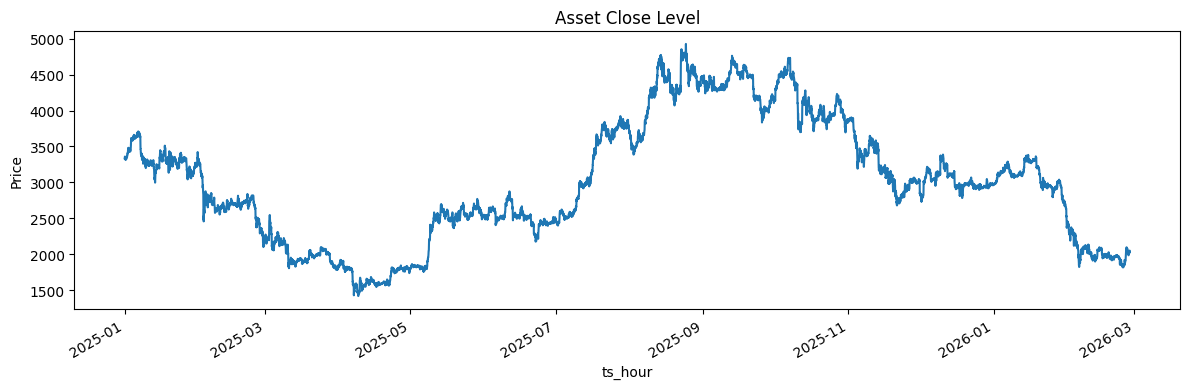

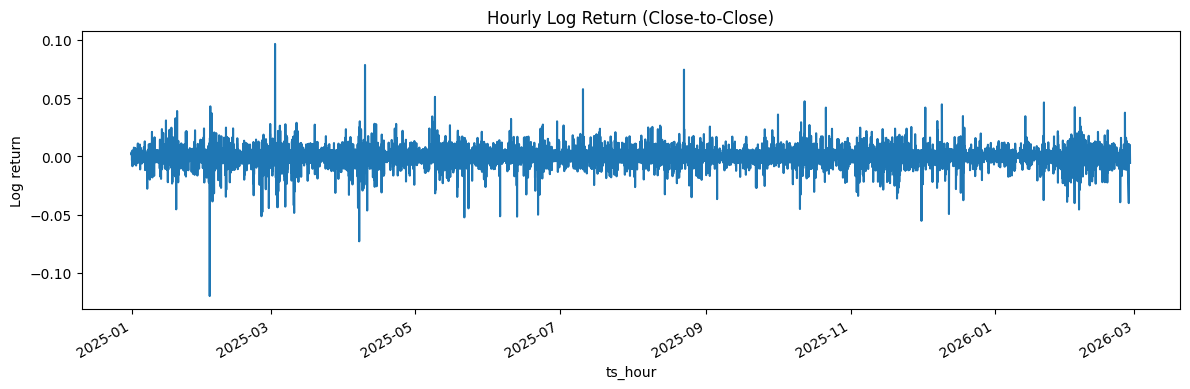

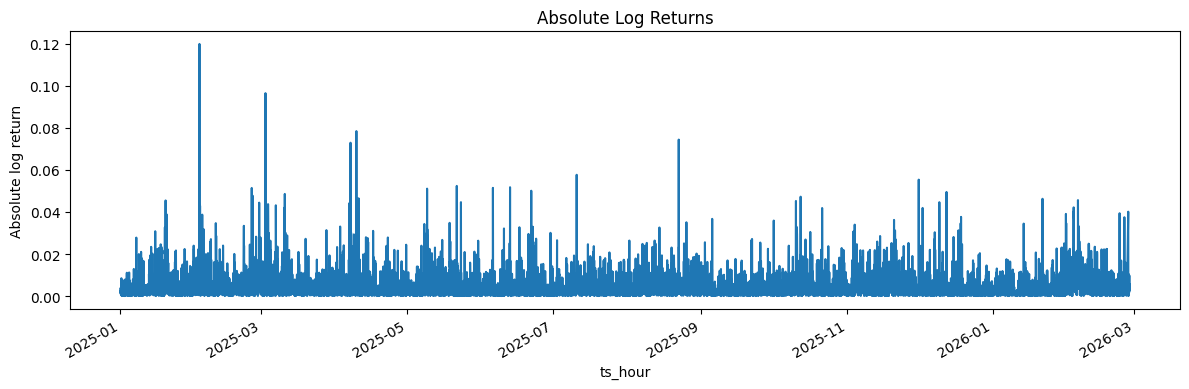

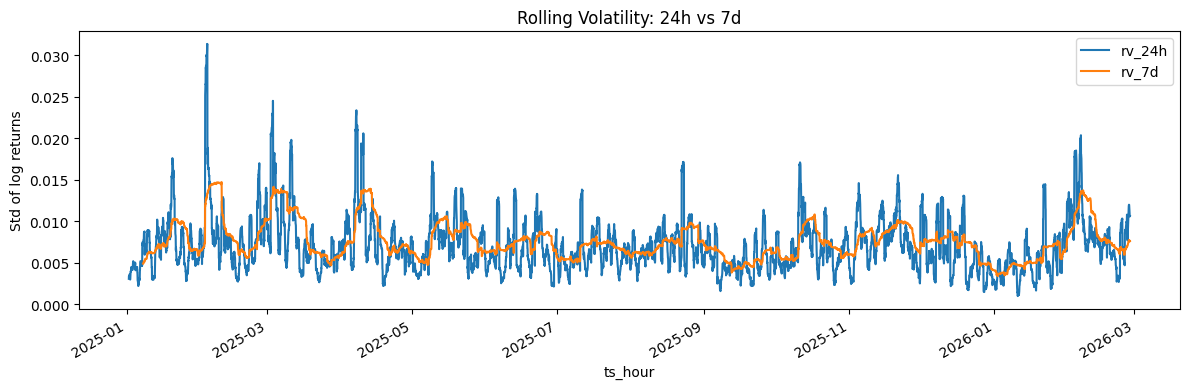

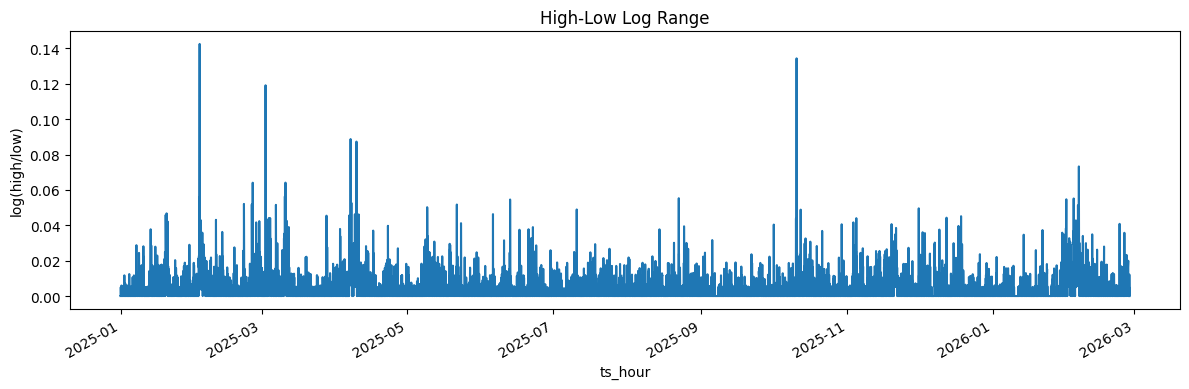

Summary statistics for r_t:


count                 10124.000000
mean                     -0.000049
std                       0.007901
skew                     -0.512403
kurtosis_nonfisher       18.474464
Name: r_t, dtype: float64

Percentiles for r_t:


p0.1    -0.047589
p1      -0.023229
p5      -0.011592
p50      0.000059
p95      0.011166
p99      0.021126
p99.9    0.041913
Name: r_t, dtype: float64

Extreme-move counts:


,threshold,count,frequency
0,|r_t| > 2*std,547,0.054030
1,|r_t| > 3*std,168,0.016594
2,|r_t| > 4*std,72,0.007112
3,|r_t| > 5*std,37,0.003655


TEST: Jarque-Bera Normality Test (r_t)
H0: Returns are normally distributed (skew=0 and kurtosis=3).
H1: Returns are not normally distributed.
Statistic: 101347, p-value: 0
sample_skew: -0.5123270707795892
sample_kurtosis: 18.466230226387417
Conclusion at alpha=0.05: Reject H0 -> returns show non-normal shape (skew and/or heavy tails).
------------------------------------------------------------------------------------------
Shapiro-Wilk note: using random subsample of 5,000 observations.
TEST: Shapiro-Wilk Normality Test (r_t)
H0: Returns follow a normal distribution.
H1: Returns do not follow a normal distribution.
Statistic: 0.877695, p-value: 1.16946e-52
Conclusion at alpha=0.05: Reject H0 -> distribution deviates from normality.
------------------------------------------------------------------------------------------


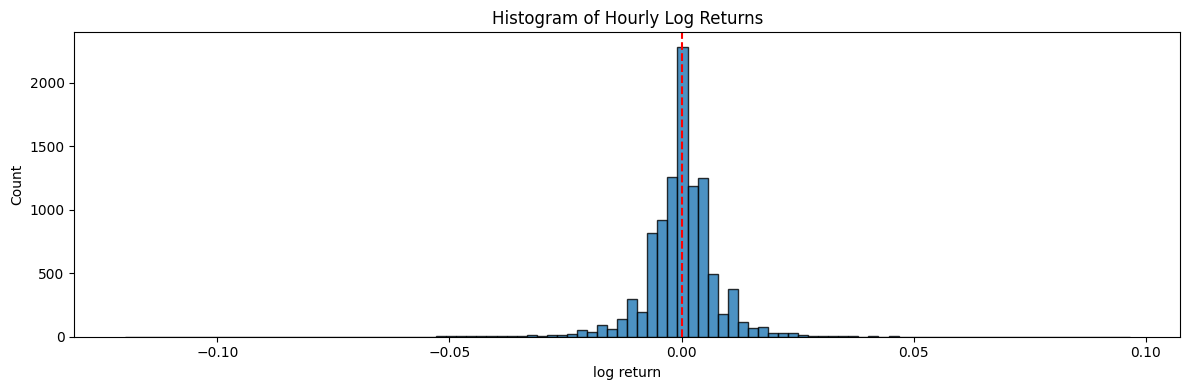

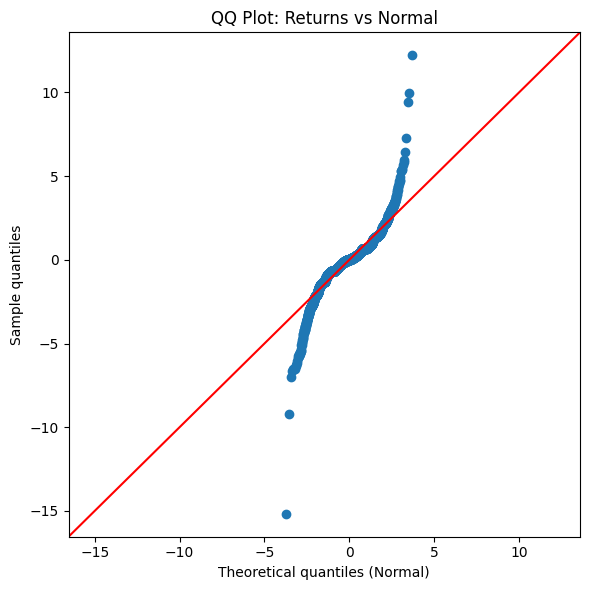

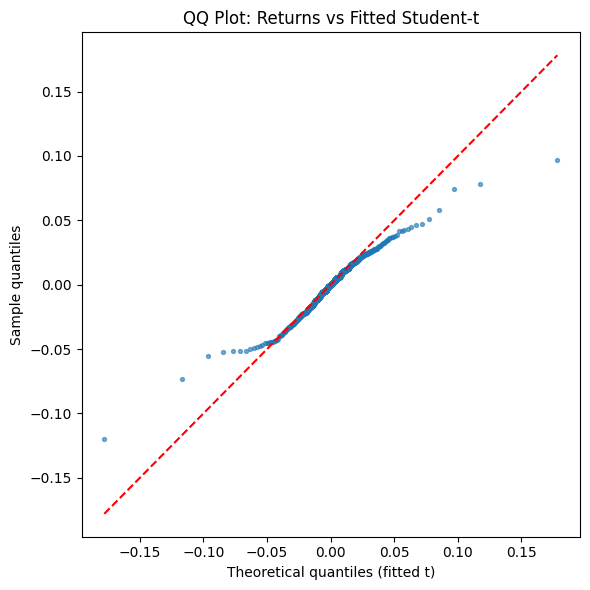

Fitted Student-t params: df=2.6322, loc=0.000135756, scale=0.00448208
TEST: ADF Test (log_close)
H0: Series has a unit root (non-stationary).
H1: Series is stationary.
Statistic: -1.15554, p-value: 0.692421
used_lag: 28
nobs: 10096
icbest: -69027.4042905143
Conclusion at alpha=0.05: Fail to reject H0 -> unit-root non-stationarity remains plausible.
------------------------------------------------------------------------------------------
TEST: KPSS Test (log_close, regression='ct')
H0: Series is stationary (around constant/trend per regression setting).
H1: Series is non-stationary.
Statistic: 2.02501, p-value: 0.01
used_lags: 59
Conclusion at alpha=0.05: Reject H0 -> series shows evidence of non-stationarity.
------------------------------------------------------------------------------------------
TEST: ADF Test (log_return_close)
H0: Series has a unit root (non-stationary).
H1: Series is stationary.
Statistic: -19.0008, p-value: 0
used_lag: 27
nobs: 10096
icbest: -69020.94404445695


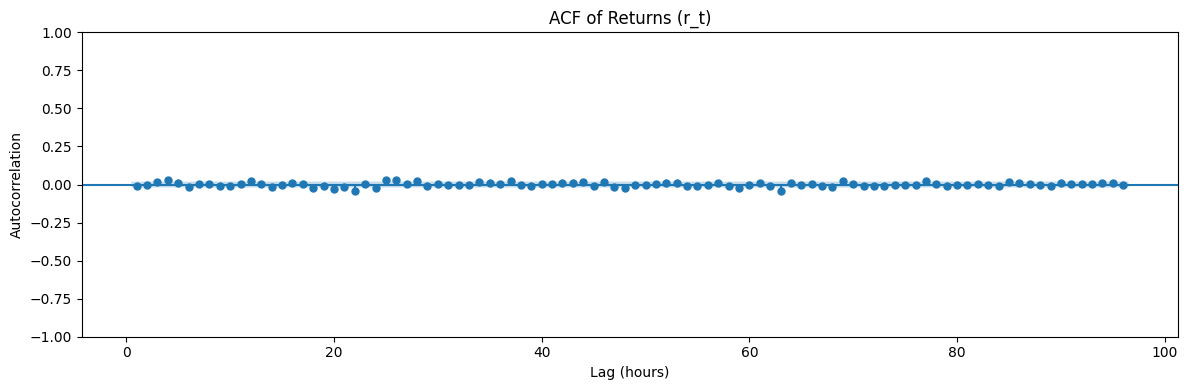

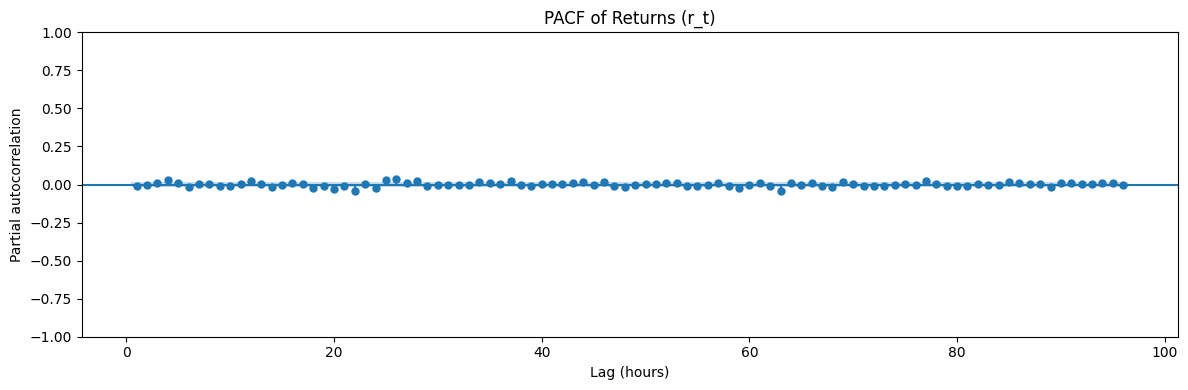

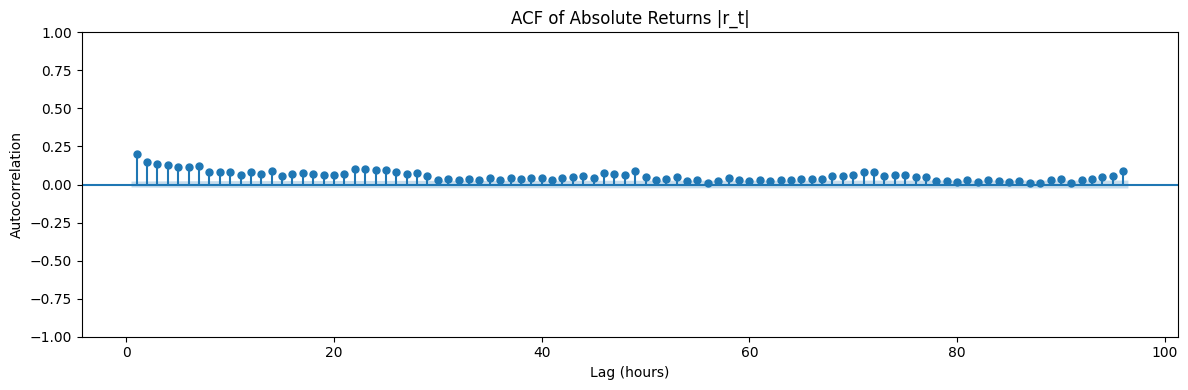

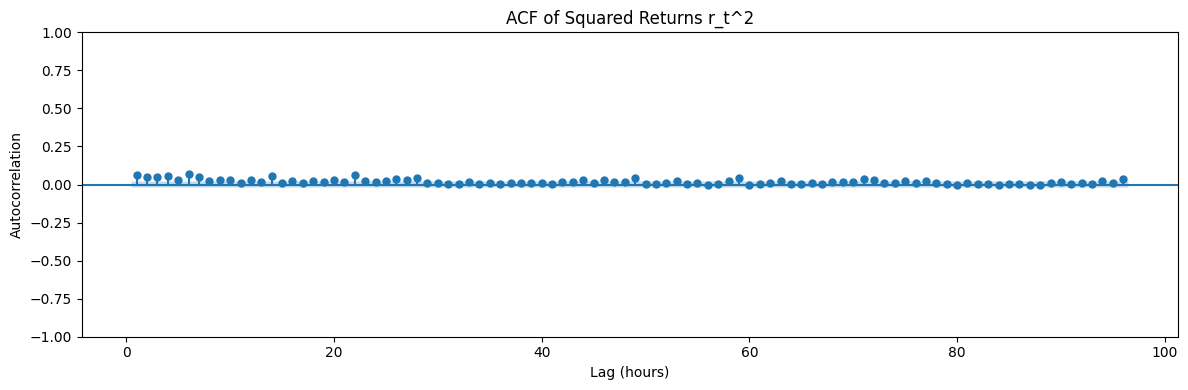

TEST FAMILY: Ljung-Box on r_t
H0: No autocorrelation up to lag L.
H1: Autocorrelation exists up to lag L.
 lag       pvalue  reject_H0
   1 2.924063e-01      False
   2 5.585542e-01      False
   3 3.964461e-01      False
   4 1.204076e-02       True
   5 1.568317e-02       True
   6 6.819010e-03       True
   8 2.028767e-02       True
  12 8.297741e-03       True
  16 9.877314e-03       True
  18 4.897557e-03       True
  24 6.750438e-07       True
  36 4.896558e-08       True
  48 2.076194e-08       True
  96 7.604765e-08       True
Overall summary: rejected at 11/14 lags. If many lags reject for squared returns, that supports conditional heteroskedasticity / GARCH.
------------------------------------------------------------------------------------------
TEST FAMILY: Ljung-Box on r_t^2
H0: No autocorrelation in squared returns up to lag L (no volatility clustering).
H1: Autocorrelation exists in squared returns up to lag L (volatility clustering).
 lag       pvalue  reject_H0
   1 3

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,0.000058,0.000003,18.076047,4.921196e-73,0.000052,0.000065
sq_r_l1,0.063162,0.037501,1.684259,9.213158e-02,-0.010339,0.136663
asym_term,0.004150,0.069167,0.059998,9.521574e-01,-0.131415,0.139714


No strong evidence of leverage asymmetry from this specification.


,threshold,empirical_prob,normal_prob,empirical_to_normal_ratio
0,|z_30d| > 3,0.018182,2.699796e-03,6.734515
1,|z_30d| > 4,0.008081,6.334248e-05,127.573275
2,|z_30d| > 5,0.003402,5.733031e-07,5934.810483


If empirical >> theoretical, tails are heavier than normal; consider Student-t innovations and/or jumps.


,k,upper_tail_index_alpha,lower_tail_index_alpha
0,200,3.216495,2.763166
1,500,2.684138,2.208504
2,1000,1.896471,1.681724


Interpretation: smaller Hill tail index implies heavier tails.


,regime,count,mean,std,kurtosis_nonfisher,P(|z_30d|>4)
0,low_vol,2489,-0.000089,0.005540,8.336443,0.004151
1,high_vol,2489,-0.000128,0.010377,18.648061,0.010771


If high-vol regime has heavier tails/more extremes, jump intensity may be state-dependent.


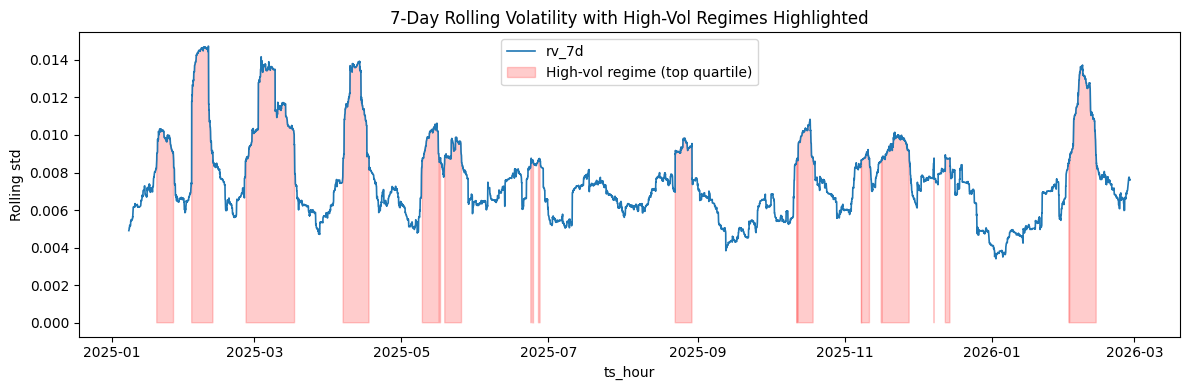

Hour-of-day stats:


,mean_return,std_return,mean_abs_return,extreme_freq
hour,,,,
0,-0.000515,0.008144,0.005259,0.012723
1,0.000001,0.010007,0.005598,0.017812
2,0.000373,0.006533,0.004669,0.002545
3,0.000039,0.006269,0.004313,0.002545
4,0.000123,0.005624,0.003968,0.000000
5,0.000115,0.006343,0.004264,0.005089
6,-0.000543,0.007123,0.004213,0.005115
7,0.000181,0.007108,0.004388,0.007673
8,0.000161,0.006233,0.004238,0.002558


Day-of-week stats (0=Mon):


,mean_return,std_return,mean_abs_return,extreme_freq
day_of_week,,,,
0,-0.000192,0.009517,0.006047,0.011161
1,-0.000035,0.008381,0.005781,0.010417
2,0.000355,0.007717,0.005249,0.005208
3,-0.000447,0.007886,0.005364,0.010487
4,0.000066,0.008565,0.005595,0.011111
5,0.000038,0.005297,0.003434,0.003720
6,-0.000127,0.007275,0.004367,0.004464


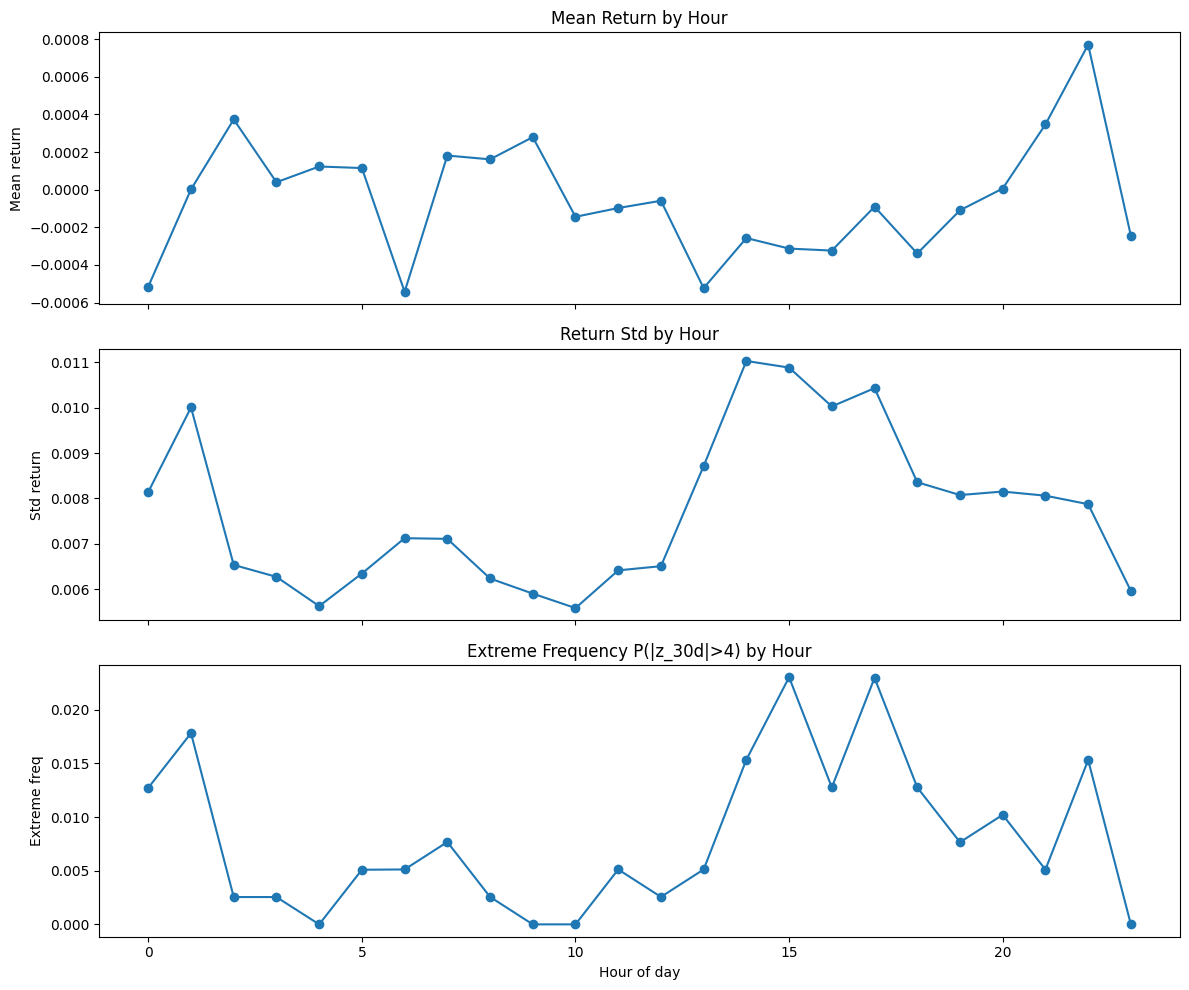

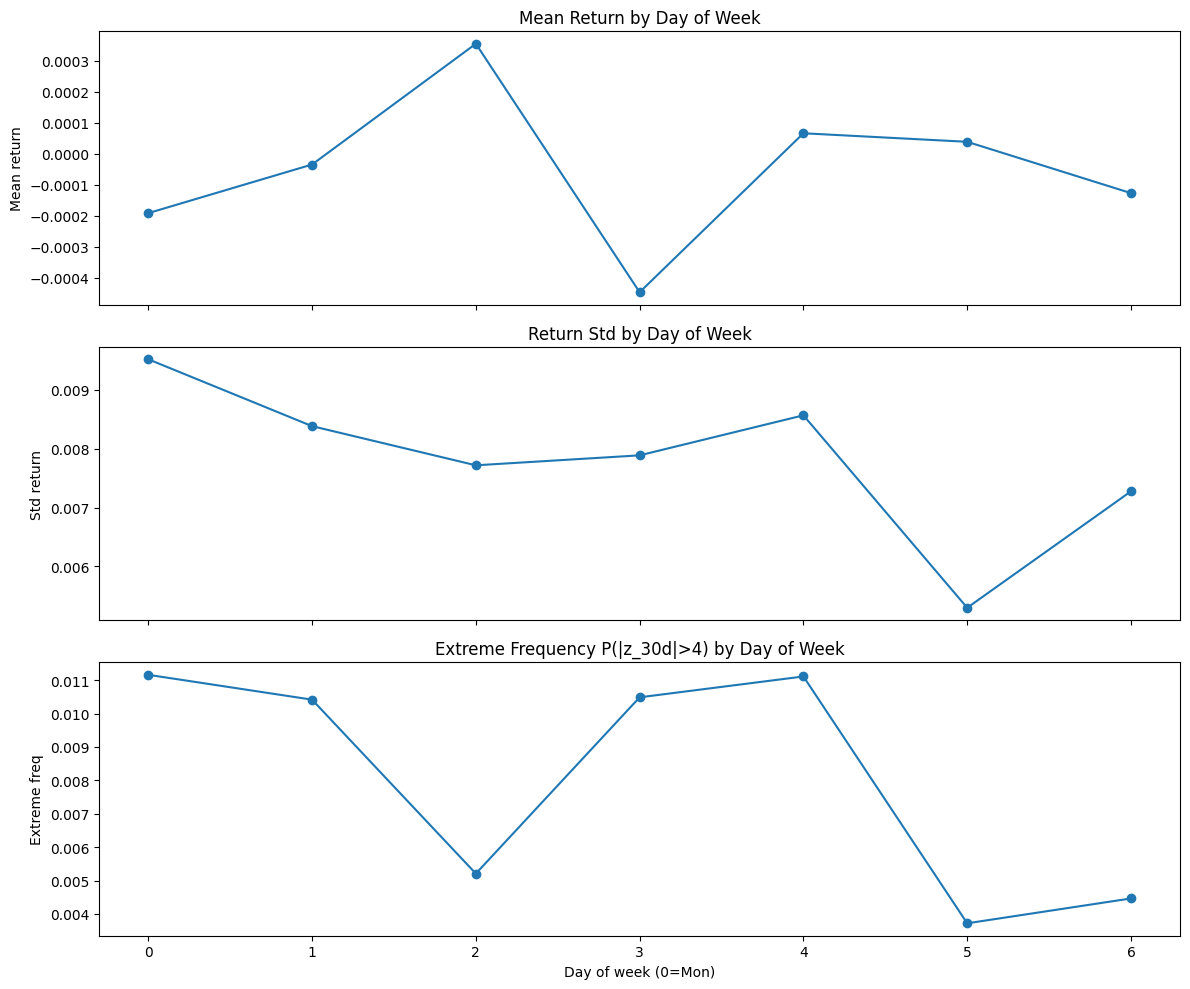

TEST: ANOVA: Mean Returns by hour
H0: Mean returns are equal across all hour groups.
H1: At least one hour group has a different mean return.
Statistic: 0.673985, p-value: 0.875592
Conclusion at alpha=0.05: Fail to reject H0 -> no strong evidence that group means differ.
------------------------------------------------------------------------------------------
TEST: ANOVA: Mean Returns by day_of_week
H0: Mean returns are equal across all day_of_week groups.
H1: At least one day_of_week group has a different mean return.
Statistic: 1.43522, p-value: 0.196769
Conclusion at alpha=0.05: Fail to reject H0 -> no strong evidence that group means differ.
------------------------------------------------------------------------------------------



- Mean dynamics:
  - Return autocorrelation appears material at multiple lags; short-memory mean dynamics may help.
  - Evidence source: Ljung-Box on returns (reject ratio=0.79).

- Volatility clustering:
  - Squared-return autocorrelation and/or ARCH test indicates conditional heteroskedasticity.
  - Evidence source: Ljung-Box on squared returns (reject ratio=1.00) and ARCH LM.

- Asymmetry:
  - No strong leverage asymmetry detected in the chosen regression specification.
  - Evidence source: leverage regression asymmetry term.

- Heavy tails / jumps:
  - Normality is rejected; tails are heavier/skewed relative to Gaussian benchmark.
  - Evidence source: Jarque-Bera, QQ diagnostics, and extreme-frequency comparison.

- Regimes:
  - High-vol regimes have higher extreme-move frequency, suggesting state-dependent tail/jump intensity.
  - Evidence source: low/high `rv_7d` regime comparison.

- Seasonality:
  - Volatility/extreme metrics vary by hour and/or day-of-week.
  - Evidence source: hour/day grouped volatility and extreme-frequency profiles.

- Recommendation template (filled from current diagnostics):
  - If return ACF is weak -> consider AR(1)/ARMA mean component; if persistent return ACF appears -> consider AR(1).
  - If ARCH present and asymmetry present -> symmetric GARCH may suffice initially; otherwise start with symmetric volatility model.
  - If extreme frequency is heavy and regimes differ -> add jump component with state-dependent intensity.
  - If hour/DOW seasonality exists -> include cyclical time features in variance/jump equations.


dict_keys(['df_ohlc', 'df_features', 'missing_index', 'summary_stats', 'percentiles', 'extreme_counts', 'test_results', 'lb_r_df', 'lb_sq_df', 'tail_compare_df', 'hill_df', 'regime_table', 'hour_stats', 'dow_stats', 'summary_markdown', 'alpha', 'lags', 'required_ohlc'])

In [2]:
# If a dataframe named `df` already exists, pass it in:
# results = ohlc_time_series_analysis(asset=ASSET, df=df, config_path=CONFIG_PATH)

# With current ETH config, this loads from Postgres table public.eth_ohlc_hourly.
results = ohlc_time_series_analysis(asset=ASSET, config_path=CONFIG_PATH)
results.keys()
